In [1]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys

In [2]:
base_dir = os.path.abspath(os.path.join('..', 'membrane'))
sys.path.append(base_dir)

In [3]:
from analysis import InterdigitationAnalysis,  Membrane_overlap_distance, MicAnalysis, OverlapAnalysis

Analysis module loaded


In [4]:
def loader(topology_path, trajectory_path):
    u = mda.Universe(topology_path, trajectory_path)
    return u

In [5]:
u1 = loader('../../trajs/gro.gro', '../../trajs/c36_skip100.xtc')
u2 = loader('../../trajs/gro.gro', '../../trajs/c36c_skip100.xtc')
u3 = loader('../../trajs/ld.psf', '../../trajs/drude_skip100.dcd')
u4 = loader('../../trajs/ld.psf', '../../trajs/eq.dcd')
u5 = loader('../../trajs/ld.psf', '../../trajs/st3.dcd')
u6 = loader('../../trajs/ld.psf', '../../trajs/st5.dcd')


First we calculate the average distance that the TG tails intercalate with the PL monolayer

In [6]:
def manager(u, start_frame=0, end_frame=None, method='all',
            atom_name='C316', lipid_1='POPC', lipid_2='DOPE', 
            lipid_3='SAPI', neutral_lipid='TRIO'):
    
    instance = Membrane_overlap_distance(u, start_frame, end_frame)
    instance.setup_groups(atom_name, lipid_1, lipid_2, lipid_3, neutral_lipid)
    results = instance.analyze_trajectory(method)
    df = instance.analysis_to_df(results)
    
    analysis = OverlapAnalysis(df, method='all')
    analysis.print_analysis()
    overlap_overtime = analysis.calculate_average_overlap_depth()
    overlap_average = analysis.calculate_average_depth_overall()
    overlap_number = analysis.calculate_number_of_overlaps_per_frame()

    return df, overlap_overtime, overlap_number


In [7]:
# Define a function that calls manager with appropriate arguments
def load_dataset(universe, start_frame=0, end_frame=None):
    return manager(
        universe, start_frame=start_frame, end_frame=end_frame, method='all',
        atom_name='C316', lipid_1='POPC', lipid_2='DOPE',
        lipid_3='SAPI', neutral_lipid='TRIO'
    )

# Now, load all datasets using the function
df_c36, time_c36, number_c36 = load_dataset(u1)
df_c36c, time_c36c, number_c36c = load_dataset(u2)
df_drude, time_drude, number_drude = load_dataset(u3, start_frame=400)
df_eq, time_eq, number_eq = load_dataset(u4)
df_3mn, time_3mn, number_3mn = load_dataset(u5)
df_5mn, time_5mn, number_5mn = load_dataset(u6)



Overall Average Overlap Depth: 4.2433114
Overall Average Overlap Depth: 4.3869414
Overall Average Overlap Depth: 3.9577122
Overall Average Overlap Depth: 3.714159
Overall Average Overlap Depth: 3.9288578
Overall Average Overlap Depth: 4.399792


In [8]:
def plot_overlap(df, title="Average Overlap Depth over Time", x_label="Time (ns)", y_label="Average Overlap Depth (Å)", ylim=(1, 7), figsize=(5, 3)):
    """
    Plots Average Overlap Depth over Time.

    Parameters:
    - df: Pandas DataFrame containing the data
    - time_col: Name of the column for the x-axis (time)
    - overlap_col: Name of the column for the y-axis (average overlap depth)
    - title: Title of the plot
    - x_label: Label for the x-axis
    - y_label: Label for the y-axis
    - ylim: Tuple specifying the y-axis limits
    - figsize: Tuple specifying the figure size
    """
    plt.figure(figsize=figsize)
    plt.plot(df["Time"], df["Average_Overlap_Depth"], marker='o', linestyle='-', color='teal', label='Average Overlap Depth')

    # Adding titles and labels with smaller font sizes
    plt.title(title, fontsize=12)
    plt.xlabel(x_label, fontsize=10)
    plt.ylabel(y_label, fontsize=10)
    plt.ylim(ylim)

    # Adding gridlines, legend, and customizing the plot
    plt.grid(visible=True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=10)
    plt.tight_layout()
    plt.show()

def plot_overlap_number(df, title="Number over Time", x_label="Time (ns)", y_label="Average Overlap Depth (Å)", ylim=(0, 100), figsize=(6, 3)):
    """
    Plots Average Overlap Depth over Time.

    Parameters:
    - df: Pandas DataFrame containing the data
    - time_col: Name of the column for the x-axis (time)
    - overlap_col: Name of the column for the y-axis (average overlap depth)
    - title: Title of the plot
    - x_label: Label for the x-axis
    - y_label: Label for the y-axis
    - ylim: Tuple specifying the y-axis limits
    - figsize: Tuple specifying the figure size
    """
    plt.figure(figsize=figsize)
    plt.plot(df["Time"], df["Number_of_Overlaps"], marker='o', linestyle='-', color='teal', label='Average Overlap Depth')

    # Adding titles and labels with smaller font sizes
    plt.title(title, fontsize=12)
    plt.xlabel(x_label, fontsize=10)
    plt.ylabel(y_label, fontsize=10)
    plt.ylim(ylim)

    # Adding gridlines, legend, and customizing the plot
    plt.grid(visible=True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=10)
    plt.tight_layout()
    plt.show()



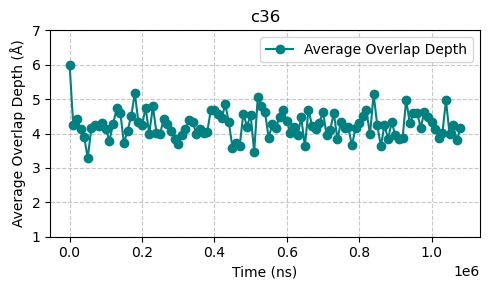

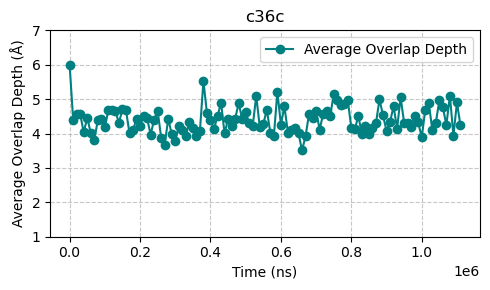

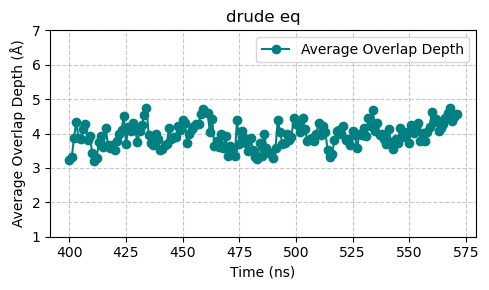

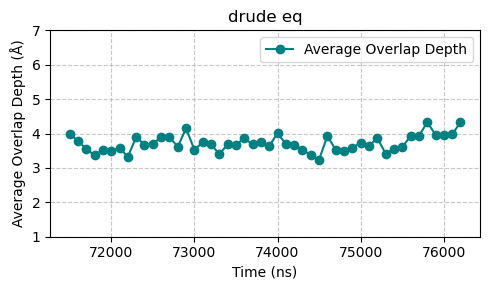

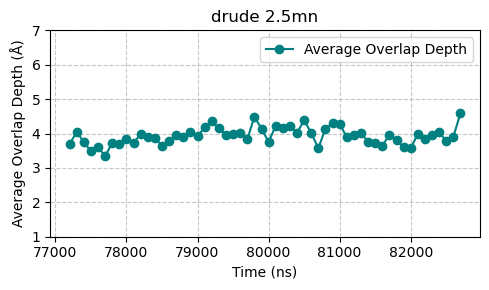

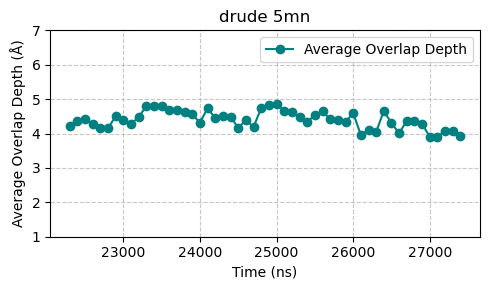

In [10]:
plot_overlap(time_c36, title='c36')
plot_overlap(time_c36c, title='c36c')
plot_overlap(time_drude, title='drude eq')
plot_overlap(time_eq,title='drude eq')
plot_overlap(time_3mn,title='drude 2.5mn')
plot_overlap(time_5mn,title='drude 5mn')


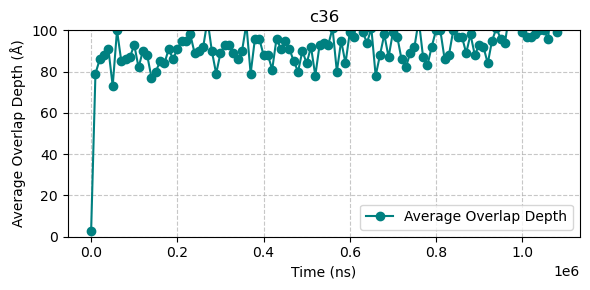

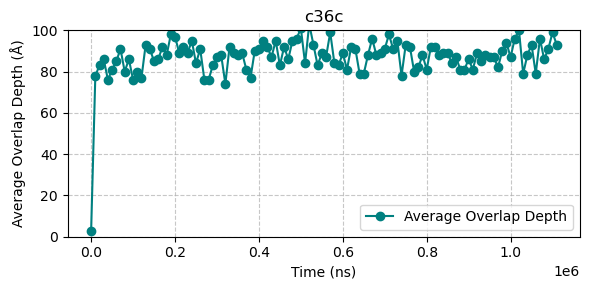

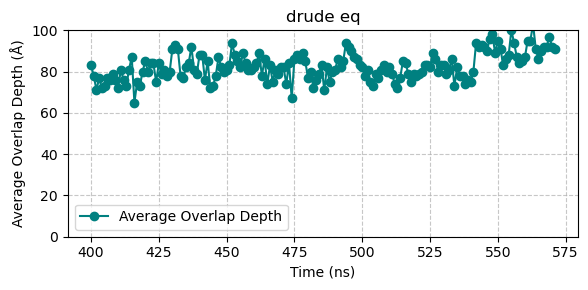

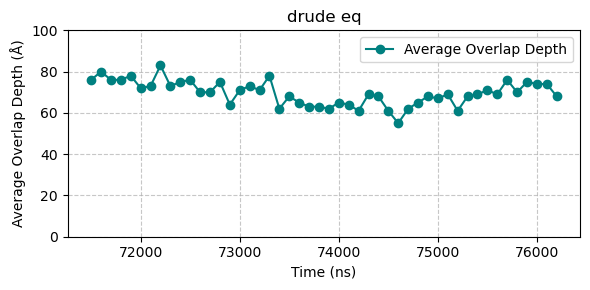

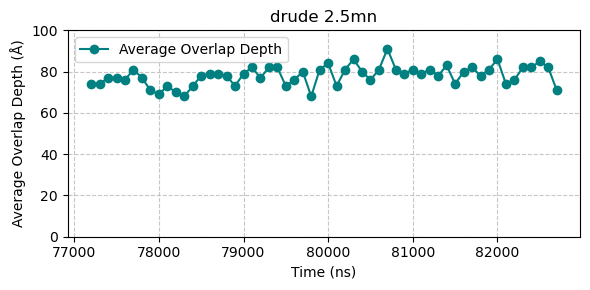

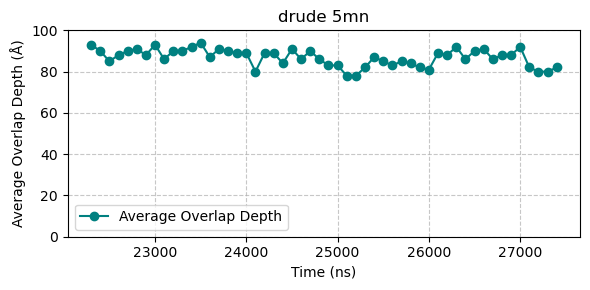

In [11]:
plot_overlap_number(number_c36, title='c36')
plot_overlap_number(number_c36c, title='c36c')
plot_overlap_number(number_drude, title='drude eq')
plot_overlap_number(number_eq, title='drude eq')
plot_overlap_number(number_3mn,title='drude 2.5mn')
plot_overlap_number(number_5mn,title='drude 5mn')


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

def histo_overlap(df, title):
    plt.figure(figsize=(4, 3))
    sns.histplot(df["Max_Overlap_Distance"], kde=True, bins=30, color='teal', stat='density')

    # Adding labels and title
    plt.title(title, fontsize=10)
    plt.xlabel("Max Overlap Distance (Å)", fontsize=14)
    plt.ylabel("Probability Density", fontsize=14)
    plt.grid(visible=True, linestyle='--', alpha=0.7)
    plt.ylim(0,0.3)
    plt.xlim(0,20)
    plt.tight_layout()
    plt.show()


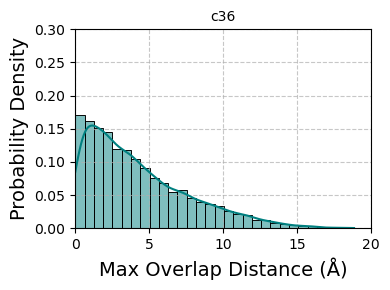

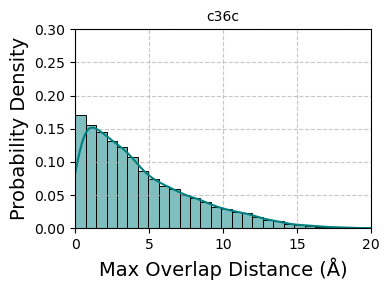

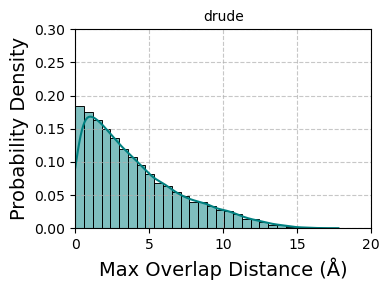

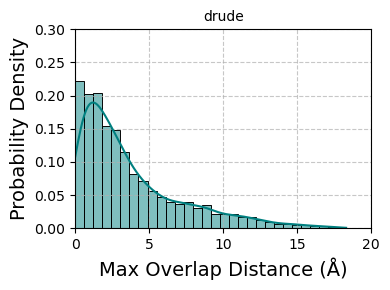

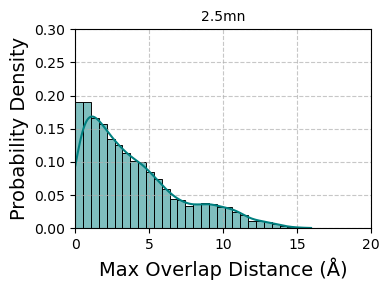

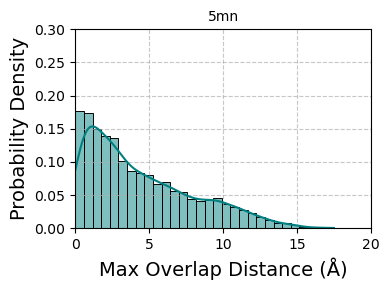

In [13]:
histo_overlap(df_c36,'c36')
histo_overlap(df_c36c, 'c36c')
histo_overlap(df_drude,'drude')
histo_overlap(df_eq,'drude')
histo_overlap(df_3mn,'2.5mn')
histo_overlap(df_5mn,'5mn')


# Interdigitation, overlap, densities

In [183]:
# Define a function to perform the analysis
def run_interdigitation_analysis(structure, trajectory, lipids, neutral_lipid, solvent, nbins=100, b=0, e=None):
    analysis = InterdigitationAnalysis(structure, trajectory, lipids, neutral_lipid, solvent)
    return analysis.interdigit(nbins=nbins, b=b, e=e)

# Use the function to perform the analyses
results_c36 = run_interdigitation_analysis(
    '../../trajs/gro.gro', '../../trajs/c36_skip100.xtc', ['POPC', 'DOPE', 'SAPI'], 'TRIO', 'TIP3'
)

results_c36c = run_interdigitation_analysis(
    '../../trajs/gro.gro', '../../trajs/c36c_skip100.xtc', ['POPC', 'DOPE', 'SAPI'], 'TRIO', 'TIP3'
)

results_drude = run_interdigitation_analysis(
    '../../trajs/ld.psf', '../../trajs/drude_skip100.dcd', ['POPC', 'DOPE'], 'TRIO', 'SWM4'
)

results_3mn = run_interdigitation_analysis(
    '../../trajs/ld.psf', '../../trajs/3mn_eq.dcd', ['POPC', 'DOPE'], 'TRIO', 'SWM4'
)

results_5mn = run_interdigitation_analysis(
    '../../trajs/ld.psf', '../../trajs/5mn.dcd', ['POPC', 'DOPE'], 'TRIO', 'SWM4'
)

results_early = run_interdigitation_analysis(
    '../../trajs/ld.psf', '../../trajs/drude_skip100.dcd', ['POPC', 'DOPE'], 'TRIO', 'SWM4',e=100
)


analyzing 0 us.... 
analyzing 1 us.... 
units: Z (nm), interdigitation (nm), time (ns), density (g/m3)
analyzing 0 us.... 
analyzing 1 us.... 
units: Z (nm), interdigitation (nm), time (ns), density (g/m3)
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us

analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 


analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 


In [184]:
def plot_interdigitation_over_time(results):
    # Extract data for plotting
    total_interdigitation = results['inter']['total']
    strong_interdigitation = results['inter']['strong']
    weak_interdigitation = results['inter']['weak']

    # Extract time and interdigitation values
    time_total, inter_total = total_interdigitation[:, 0], total_interdigitation[:, 1]
    time_strong, inter_strong = strong_interdigitation[:, 0], strong_interdigitation[:, 1]
    time_weak, inter_weak = weak_interdigitation[:, 0], weak_interdigitation[:, 1]

    # Create the plot
    plt.figure(figsize=(5, 2))
    plt.plot(time_total, inter_total, label='Total Intedigitation', color='blue')
    plt.plot(time_strong, inter_strong, label='Strong Intedigitation', color='green')
    plt.plot(time_weak, inter_weak, label='Weak Intedigitation', color='red')

    plt.title('Interdigitation Over Time')
    plt.xlabel('Time (ns)')
    plt.ylabel('Interdigitation (nm)')
    plt.ylim(0, 2.9)
#     plt.legend()
    plt.grid(True)
    plt.show()
def plot_overlap(results):
    # Extract data for plotting
    total_overlap = results['ov']['total']
    strong_overlap = results['ov']['strong']
    weak_overlap = results['ov']['weak']

    # Extract z-coordinates and overlap values
    z_coords, ov_total = total_overlap[:, 0], total_overlap[:, 1]
    _, ov_strong = strong_overlap[:, 0], strong_overlap[:, 1]
    _, ov_weak = weak_overlap[:, 0], weak_overlap[:, 1]

    # Create the plot
    plt.figure(figsize=(5, 2))
    plt.plot(z_coords, ov_total, label='Total Overlap', color='blue', linewidth=2)
    plt.plot(z_coords, ov_strong, label='Strong Overlap', color='green', linewidth=2)
    plt.plot(z_coords, ov_weak, label='Weak Overlap', color='red', linewidth=2)

    plt.title('Overlap as a Function of Z-coordinate')
    plt.xlabel('Z-coordinate (nm)')
    plt.ylabel('Overlap (dimensionless)')
    plt.ylim(0, 1)
    plt.legend()
    plt.grid(True)
    plt.show()

# Assuming 'results' is your data dictionary loaded as per your simulation outputs


def plot_densities(results):
    # Extract density data
    pl_density = results['density']['PL']
    trio_density = results['density']['TRIO']
    surf_trio_density = results['density']['SURF-TRIO']
    core_trio_density = results['density']['CORE-TRIO']
    water_density = results['density']['water']

    # Extract z-coordinates and density values
    z_coords, den_pl = pl_density[:, 0], pl_density[:, 1]
    _, den_trio = trio_density[:, 0], trio_density[:, 1]
    _, den_surf_trio = surf_trio_density[:, 0], surf_trio_density[:, 1]
    _, den_core_trio = core_trio_density[:, 0], core_trio_density[:, 1]
    _, den_water = water_density[:, 0], water_density[:, 1]

    # Create the plot
    plt.figure(figsize=(5, 2))
    plt.plot(z_coords, den_pl, label='PL Density', color='blue', linewidth=2)
    plt.plot(z_coords, den_trio, label='TRIO Density', color='green', linewidth=2)
    plt.plot(z_coords, den_surf_trio, label='SURF-TRIO Density', color='red', linewidth=2)
    plt.plot(z_coords, den_core_trio, label='CORE-TRIO Density', color='purple', linewidth=2)
    plt.plot(z_coords, den_water, label='Water Density', color='cyan', linewidth=2)
#     plt.ylim(0,0.02)

    plt.title('Density Profiles Along Z-Coordinate')
    plt.xlabel('Z-coordinate (nm)')
    plt.ylabel('Density (g/m³)')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_ratios(results):
    # Extract data for plotting
    num_ratio = results['ratio']['num']          # Number of strong interdigitating molecules over time
    trio_to_pl_ratio = results['ratio']['trio-to-pl']  # Ratio of strong interdigitating molecules to phospholipids
    trio_to_pl_trio_ratio = results['ratio']['trio-to-pl+trio']  # Ratio of strong interdigitating molecules to the sum of phospholipids and strong interdigitating molecules

    # Extract time and ratio values
    time_num, ratio_num = num_ratio[:, 0], num_ratio[:, 1]
    time_trio_to_pl, ratio_trio_to_pl = trio_to_pl_ratio[:, 0], trio_to_pl_ratio[:, 1]
    time_trio_to_pl_trio, ratio_trio_to_pl_trio = trio_to_pl_trio_ratio[:, 0], trio_to_pl_trio_ratio[:, 1]

    # Create the plot
    plt.figure(figsize=(8, 6))
    plt.subplot(311)  # 3 rows, 1 column, 1st subplot
    plt.plot(time_num, ratio_num, label='Number of Strong Interdigitators', color='blue', linewidth=2)
    plt.title('Number of Strong Interdigitating Molecules Over Time')
    plt.xlabel('Time (ns)')
    plt.ylabel('Number')
    plt.ylim(0,20)
#     plt.legend()
    plt.grid(True)

    plt.subplot(312)  # 3 rows, 1 column, 2nd subplot
    plt.plot(time_trio_to_pl, ratio_trio_to_pl, label='Ratio of Strong Interdigitators to PL', color='green', linewidth=2)
    plt.title('Ratio of Strong Interdigitating Molecules to Phospholipids')
    plt.xlabel('Time (ns)')
    plt.ylabel('Ratio')
#     plt.legend()
    plt.grid(True)

    plt.subplot(313)  # 3 rows, 1 column, 3rd subplot
    plt.plot(time_trio_to_pl_trio, ratio_trio_to_pl_trio, label='Ratio of Strong Interdigitators to PL+Strong Interdigitators', color='red', linewidth=2)
    plt.title('Ratio of Strong Interdigitating Molecules to Total (PL + Strong Interdigitators)')
    plt.xlabel('Time (ns)')
    plt.ylabel('Ratio')
#     plt.legend()
    plt.grid(True)

    plt.tight_layout()  # Adjust subplots to fit into figure area.
    plt.show()




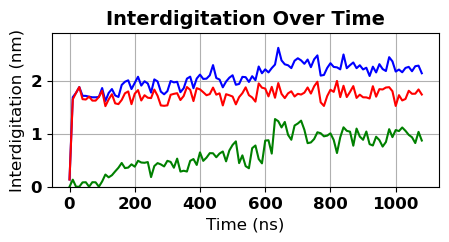

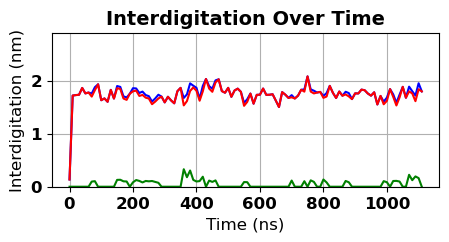

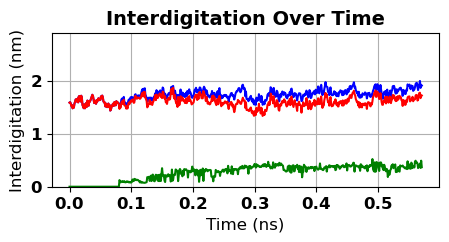

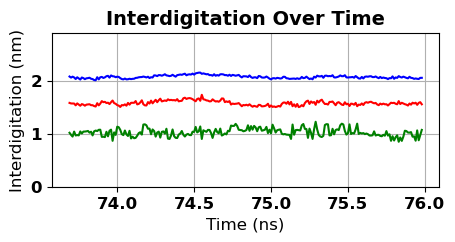

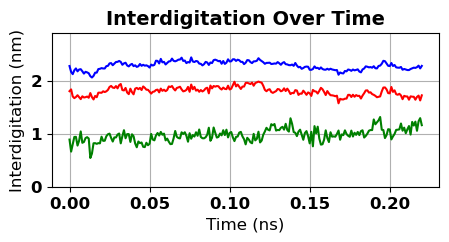

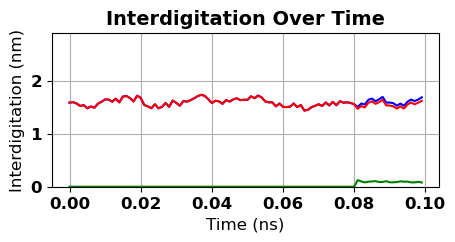

In [185]:
# Assuming 'results' is your data dictionary loaded as per your simulation outputs
plot_interdigitation_over_time(results_c36)
plot_interdigitation_over_time(results_c36c)
plot_interdigitation_over_time(results_drude)
plot_interdigitation_over_time(results_3mn)
plot_interdigitation_over_time(results_5mn)
plot_interdigitation_over_time(results_early)

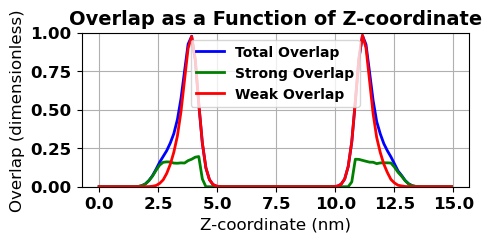

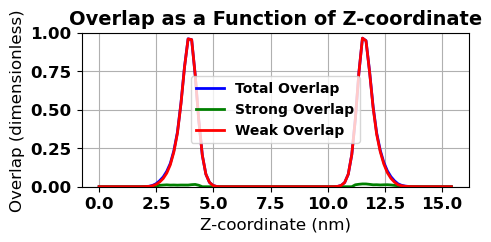

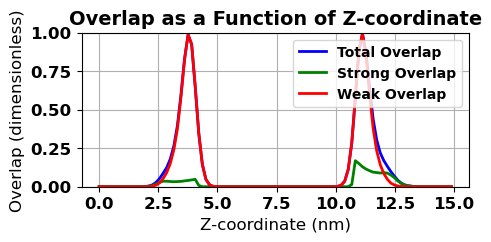

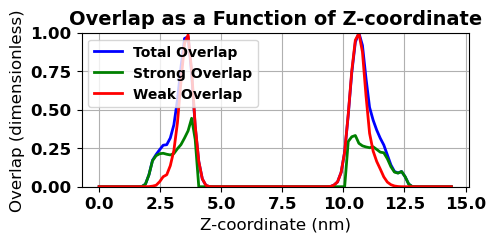

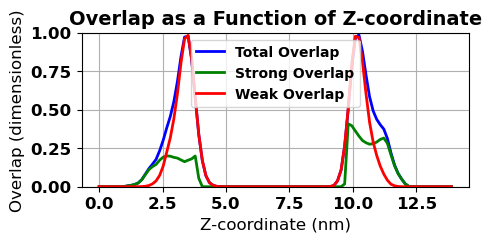

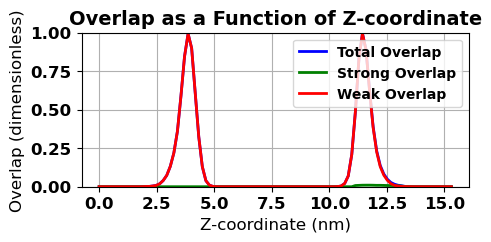

In [186]:
plot_overlap(results_c36)
plot_overlap(results_c36c)
plot_overlap(results_drude)
plot_overlap(results_3mn)
plot_overlap(results_5mn)
plot_overlap(results_early)

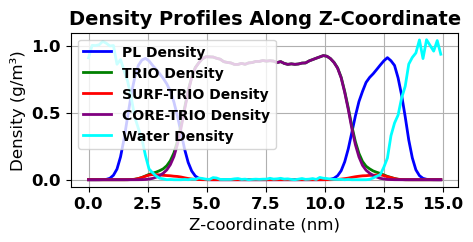

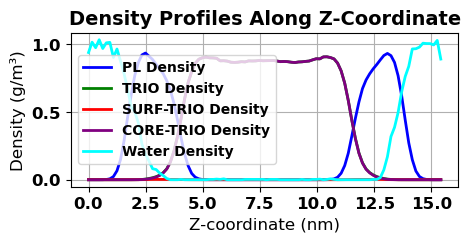

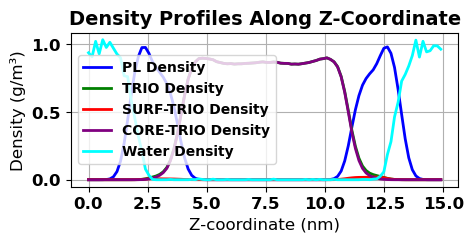

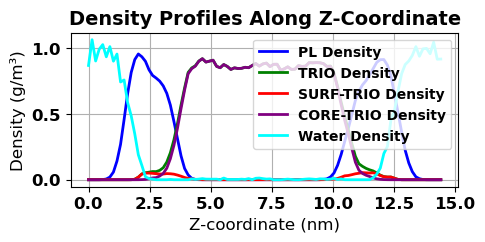

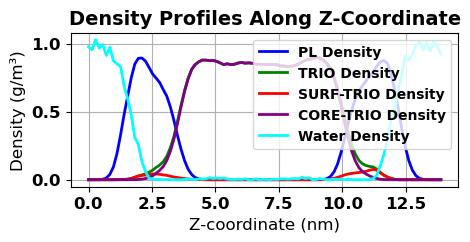

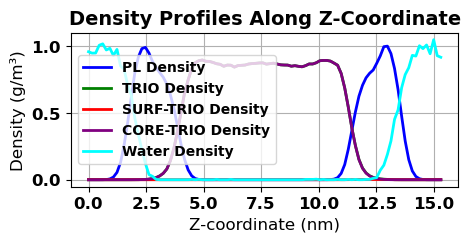

In [187]:

# Assuming 'results' is your data dictionary loaded as per your simulation outputs
plot_densities(results_c36)
plot_densities(results_c36c)
plot_densities(results_drude)
plot_densities(results_3mn)
plot_densities(results_5mn)
plot_densities(results_early)

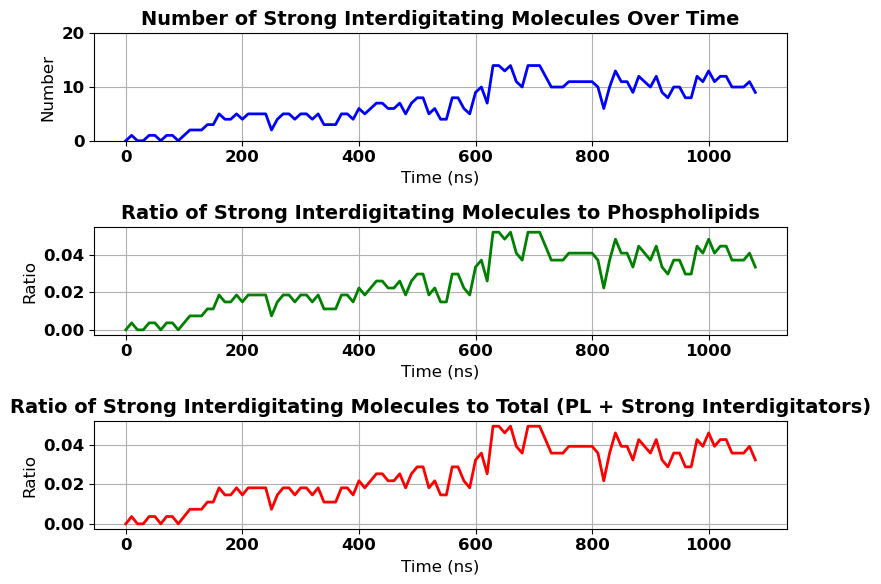

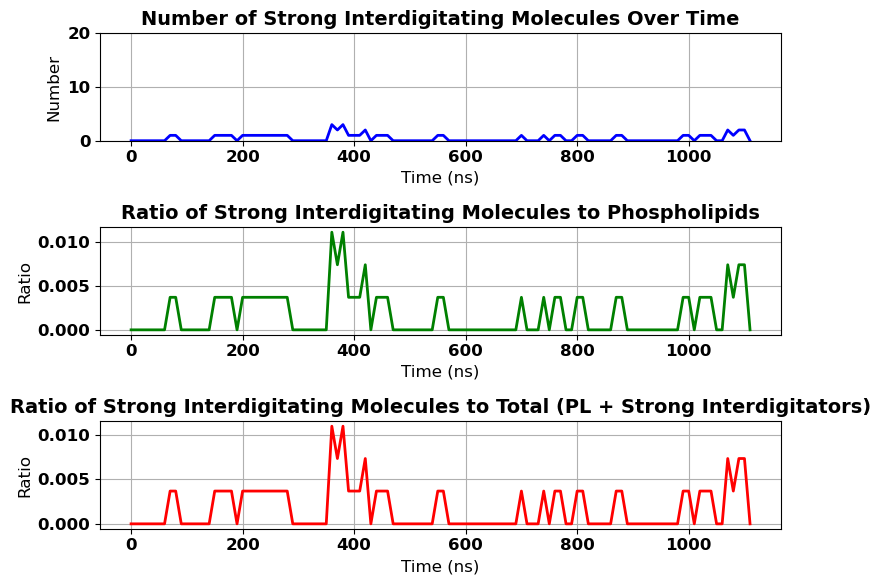

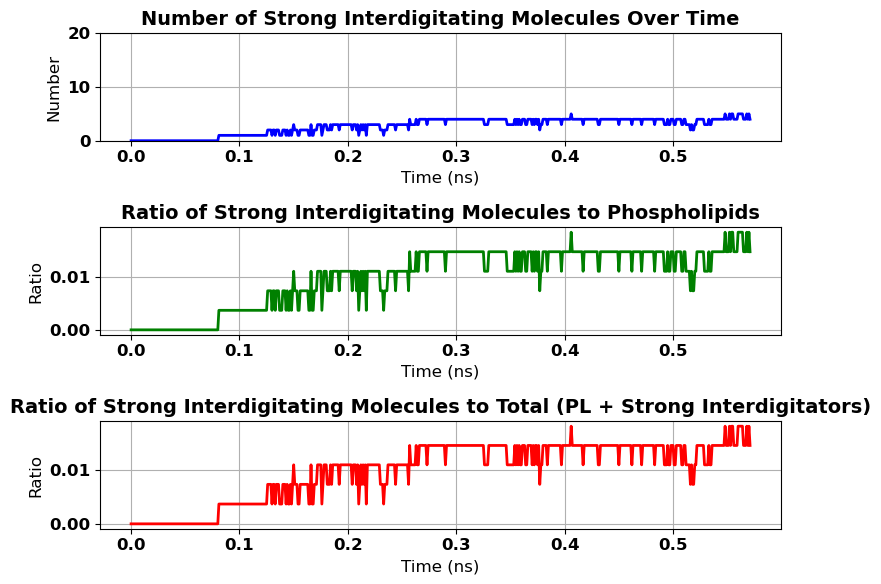

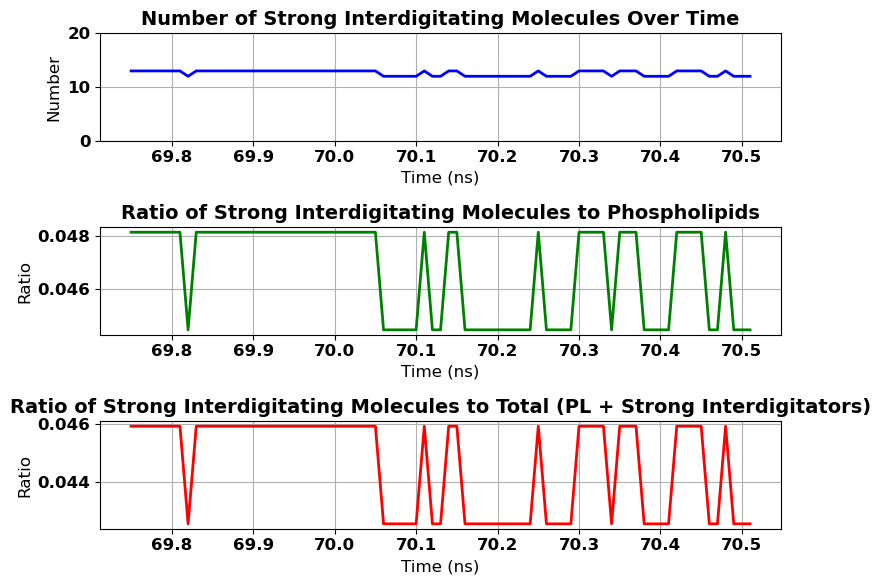

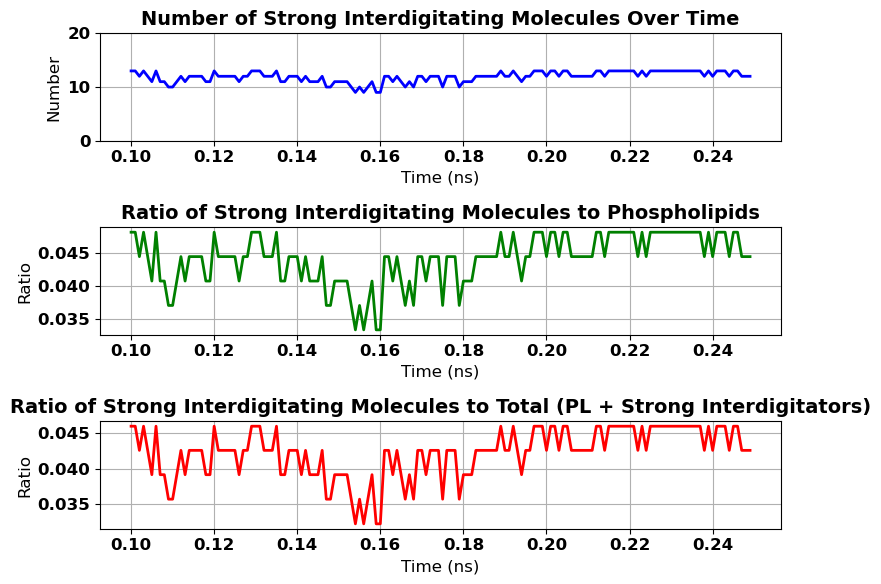

In [156]:
plot_ratios(results_c36)
plot_ratios(results_c36c)
plot_ratios(results_drude)
plot_ratios(results_drude_eq)
plot_ratios(results_drude_3mn)

# Develop method for new interdigitation

In [188]:

def percent_overlap(results, type1_name, type2_name):
    # Retrieve density arrays from the results using the provided names
    type_density_1 = results['density'][type1_name]
    type_density_2 = results['density'][type2_name]
    z = type_density_1[:, 0]
    if type_density_1.shape != type_density_2.shape:
        raise ValueError("The two density arrays must have the same shape.")
    overlap_density = np.minimum(type_density_1[:, 1], type_density_2[:, 1])
    total_area = np.trapz(type_density_1[:, 1], x=z)
    overlap_area = np.trapz(overlap_density, x=z)
    overlap_percentage = (overlap_area / total_area) * 100
    print(f"The overlap of {type2_name} with {type1_name} represents {overlap_percentage:.2f}% of the total {type1_name} area.")
    return(overlap_percentage)


In [189]:
def percent_overlap_time_series(results, type1_name, type2_name):
    # Retrieve time-series density arrays from the results
    type_series_1 = results['density'][f'{type1_name}_series']
    type_series_2 = results['density'][f'{type2_name}_series']
    times = results['inter']['total'][:, 0]  # Assuming this time array is appropriate for both densities
    z = results['density'][type1_name][:, 0]  # Assuming the z-axis values are the same for both densities
    if type_series_1.shape != type_series_2.shape:
        raise ValueError("The two time-series density arrays must have the same shape.")
    overlap_percentages = []
    for t in range(len(times)):
        overlap_density = np.minimum(type_series_1[t], type_series_2[t])
        total_area = np.trapz(type_series_1[t], x=z)
        overlap_area = np.trapz(overlap_density, x=z)
        overlap_percentage = (overlap_area / total_area) * 100
        overlap_percentages.append(overlap_percentage)
    overlap_percentages = np.array(overlap_percentages)
    for time, overlap in zip(times, overlap_percentages):
        print(f"At time {time} ns, the overlap of {type2_name} with {type1_name} is {overlap:.2f}%.")

    return times, overlap_percentages


In [190]:
# Assuming `results_c36` is your results dictionary containing the time-series densities
times1, overlap_evolution1 = percent_overlap_time_series(results_c36, 'PL', 'CORE-TRIO')
times2, overlap_evolution2 = percent_overlap_time_series(results_c36c, 'PL', 'CORE-TRIO')
times3, overlap_evolution3 = percent_overlap_time_series(results_drude, 'PL', 'CORE-TRIO')

times4, overlap_evolution4 = percent_overlap_time_series(results_3mn, 'PL', 'CORE-TRIO')
times5, overlap_evolution5 = percent_overlap_time_series(results_5mn, 'PL', 'CORE-TRIO')
times6, overlap_evolution6 = percent_overlap_time_series(results_early, 'PL', 'CORE-TRIO')


At time 0.0 ns, the overlap of CORE-TRIO with PL is 0.56%.
At time 10.0 ns, the overlap of CORE-TRIO with PL is 11.37%.
At time 20.0 ns, the overlap of CORE-TRIO with PL is 12.12%.
At time 30.0 ns, the overlap of CORE-TRIO with PL is 13.35%.
At time 40.0 ns, the overlap of CORE-TRIO with PL is 11.37%.
At time 50.0 ns, the overlap of CORE-TRIO with PL is 11.35%.
At time 60.0 ns, the overlap of CORE-TRIO with PL is 11.67%.
At time 70.0 ns, the overlap of CORE-TRIO with PL is 11.70%.
At time 80.0 ns, the overlap of CORE-TRIO with PL is 11.17%.
At time 90.0 ns, the overlap of CORE-TRIO with PL is 12.23%.
At time 100.0 ns, the overlap of CORE-TRIO with PL is 12.80%.
At time 110.0 ns, the overlap of CORE-TRIO with PL is 10.45%.
At time 120.0 ns, the overlap of CORE-TRIO with PL is 11.14%.
At time 130.0 ns, the overlap of CORE-TRIO with PL is 12.23%.
At time 140.0 ns, the overlap of CORE-TRIO with PL is 10.72%.
At time 150.0 ns, the overlap of CORE-TRIO with PL is 10.82%.
At time 160.0 ns, th

In [191]:
def plot_overlap_evolution(times, overlap_evolution):
    plt.rc('font', size=12, weight='bold')
    plt.rc('axes', titlesize=14, labelsize=12, titleweight='bold')
    plt.rc('legend', fontsize=10)

    # Create the plot
    plt.figure(figsize=(5, 3))
    plt.plot(times, overlap_evolution, marker='o', markersize=3, linewidth=2.5, label='Overlap Evolution')
    plt.title('Overlap Percentage Over Time')
    plt.xlabel('Time (ns)')
    plt.ylabel('Overlap Percentage (%)')
    plt.ylim(0, 20)
    plt.grid(True)
    plt.show()


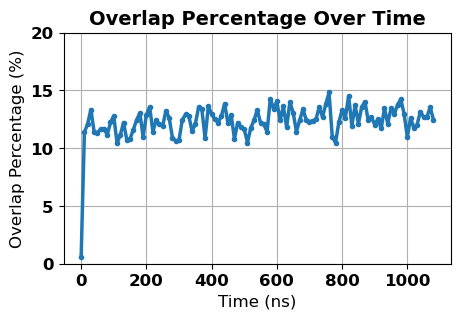

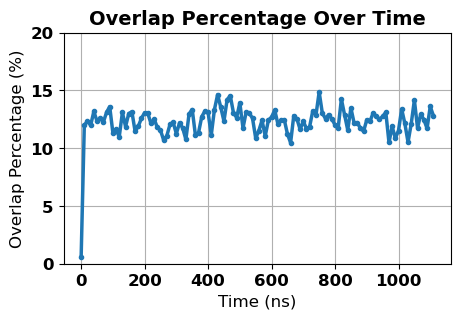

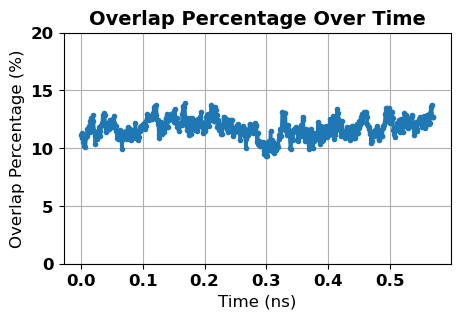

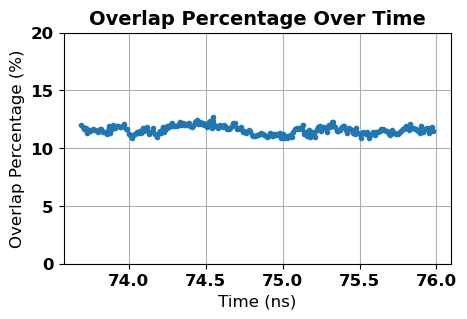

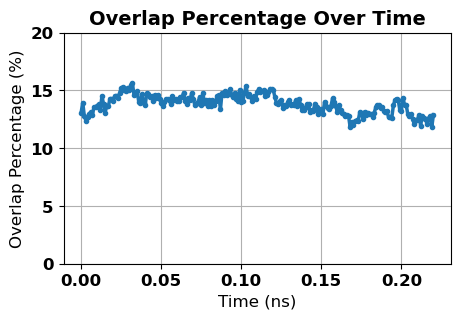

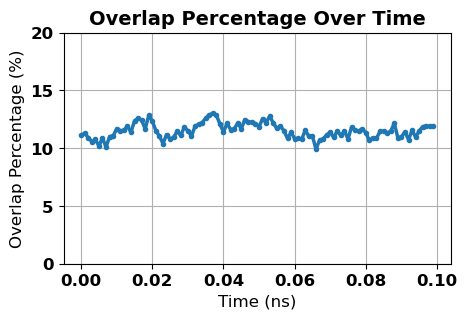

In [192]:
plot_overlap_evolution(times1, overlap_evolution1)
plot_overlap_evolution(times2, overlap_evolution2)
plot_overlap_evolution(times3, overlap_evolution3)
plot_overlap_evolution(times4, overlap_evolution4)
plot_overlap_evolution(times5, overlap_evolution5)
plot_overlap_evolution(times6, overlap_evolution6)

In [67]:
percent_overlap(results_drude, 'PL', 'SURF-TRIO')


The overlap of SURF-TRIO with PL represents 1.18% of the total PL area.


1.1805354907013377

In [68]:
import matplotlib.pyplot as plt
import numpy as np

def plot_ov(results, type_1_name, type_2_name):
    # Retrieve density data from the results
    type_1 = results['density'][type_1_name]
    type_2 = results['density'][type_2_name]
    z = type_1[:, 0]  # Adjust the 'end' and 'num' based on your data specifics

    # Set font properties globally
    plt.rc('font', size=12, weight='bold')  # Increase font size and weight
    plt.rc('axes', titlesize=14, labelsize=12, titleweight='bold')
    plt.rc('legend', fontsize=10)

    # Create the plot
    plt.figure(figsize=(5, 2))  # Larger figure for more space around legend
    plt.plot(z, type_1[:, 1], label=f'{type_1_name} Density', color='blue', linewidth=3.5)
    plt.plot(z, type_2[:, 1], label=f'{type_2_name} Density', color='red', linewidth=3.5)
    plt.fill_between(z, 0, np.minimum(type_1[:, 1], type_2[:, 1]), color='purple', alpha=0.8, label='Overlap Region')
    plt.title('Density Distribution with Overlap (C36)')
    plt.xlabel('Depth (z)')
    plt.ylabel('Density')

    # Position legend outside of the plot
#     plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
#     plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the plot to fit the legend
    plt.grid(True)
    plt.show()


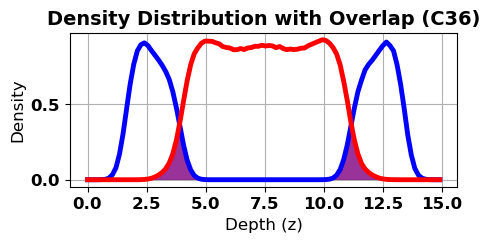

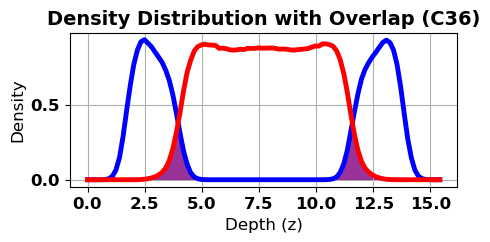

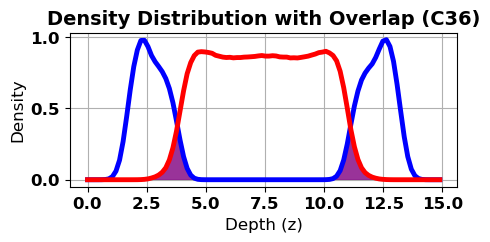

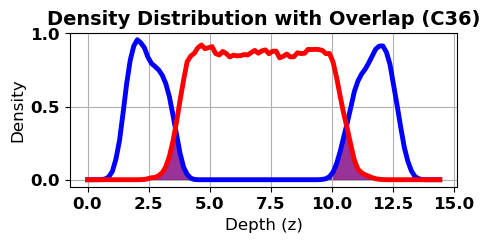

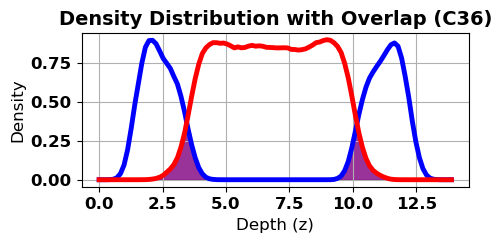

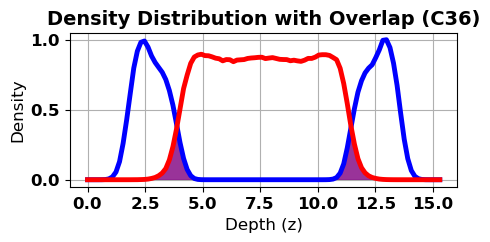

In [193]:
plot_ov(results_c36, 'PL', 'CORE-TRIO')
plot_ov(results_c36c, 'PL', 'CORE-TRIO')
plot_ov(results_drude, 'PL', 'CORE-TRIO')
plot_ov(results_3mn, 'PL', 'CORE-TRIO')
plot_ov(results_5mn, 'PL', 'CORE-TRIO')
plot_ov(results_early, 'PL', 'CORE-TRIO')

In [171]:

# z = np.linspace(0, 100, num=len(pl_density[:, 1]))
z = pl_density[:,0] 
area_under_curve = np.trapz(pl_density[:, 1], x=z)

In [180]:
# Minimum of PL and TG densities at each point along the z-axis
overlap_density = np.minimum(pl_density[:, 1], surf_density[:, 1])
overlap_area = np.trapz(overlap_density, x=z)
total_pl_area = np.trapz(pl_density[:, 1], x=z)
overlap_percentage = (overlap_area / total_pl_area) * 100
print(f"The overlap of TG with PL represents {overlap_percentage:.2f}% of the total PL area.")

The overlap of TG with PL represents 8.38% of the total PL area.
